In [1]:
#from http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Summary of Zheng 2016 heat shock response model

The central feature of this model is that the key transcription factor involved in the induction of the heat shock response in yeast, heat shock factor 1 (HSF1), is constitutively bound and repressed by chaperones; after heat shock there is an increase in the number of client proteins (both unfolded proteins and proteins that assemble in response to stress) which titrates away the HSP70, allowing HSF1 to upregulate HSP70. When all the client protein is bound by HSP70, the remaining free HSP70 can then bind to HSF1, negatively regulating its own transcription.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [48]:
def deriv(z, t):
    """Function used with odeint to simulate the heat shock response including HSF1 activity, HSP70, and unfolded proteins"""
    
    HSP = z[0]
    HSF1 = z[1]
    HSP_HSF1 = z[2]
    HSP_UP = z[3]
    UP = z[4]
    YFP = z[5]
        
    dHSPdt = k2*HSP_HSF1 - k1*HSP*HSF1 + (k4 + k5)*HSP_UP - k3*HSP*UP + \
    beta*(HSF1**n / (Kd**n + HSF1**n))
    dHSF1dt = k2*HSP_HSF1 - k1*HSP*HSF1
    dHSP_HSF1dt = -k2*HSP_HSF1 + k1*HSP*HSF1
    dHSP_UPdt = -(k4 + k5)*HSP_UP + k3*HSP*UP
    dUPdt = k4*HSP_UP - k3*HSP*UP
    dYFPdt = beta*(HSF1**n / (Kd**n + HSF1**n)) - kdil*YFP
    
    
    return(np.array([dHSPdt, dHSF1dt, dHSP_HSF1dt, dHSP_UPdt, dUPdt, dYFPdt]))


def plot_species_vs_time(data, time, colors, temps, species_name, index):
    """For a matrix of data where each column is the amount of a species """
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(111)
    if type(index) == int:
        for i in range(len(data)):
            ax.plot(time, data[i][:,index], color = colors[i], label = temps[i])
    elif type(index) == list:
        for i in range(len(data)):
            for j in range(len(index)):
                if j == 0:
                    to_plot = np.asarray(data[i][:,index[j]])
                else:
                    to_plot += np.asarray(data[i][:,index[j]])
            ax.plot(time, to_plot, color = colors[i], label = temps[i])
    else:
        print("Invalid index type; must be int or list of integers")
        return()
    ax.legend(title="Temperature")
    title = "{} vs. time".format(species_name)
    plt.title(title)
    plt.show()
    

In [25]:
# Parameters
k1 = 166.8 # per min per au, client:hsp70 off rate
k3 = k1
k2 = 2.783 # per min, HSP70:HSF1 off rate
k4 = 0.0464 # per min HSP70:UP off rate
k5 = 4.64e-7 # degradation rate of HSP70:UP
beta = 1.778 # Transcription activation rate
Kd = 0.0022 # Dissociation constant of HSF1-DNA interaction
kdil = 2.78e-3 # Dilution rate of YFP; assuming 50% growth rate
n = 3 # Hill coefficient


# Initial values
HSP_0 = 1 # Free HSP70
HSF1_0 = 0 # Free HSF1
HSP_HSF1_0 = 1/500.
HSP_UP_0 = 0
YFP_0 = 3 # 

In [26]:
T = [37, 39, 40, 42, 45]
z = []

for t in T:
    UP_0 = 0.0024*np.exp(0.215*t) # generates initial value of UP; empirical
    time = np.arange(0, 200, 0.1)
    zinit = np.array([HSP_0, HSF1_0, HSP_HSF1_0, HSP_UP_0, UP_0, YFP_0])
    z.append(odeint(deriv, zinit, time))


## Plots
names = ['37', '39', '40', '42', '45']
colors = ['royalblue', 'firebrick', 'gold', 'darkgreen', 'k']

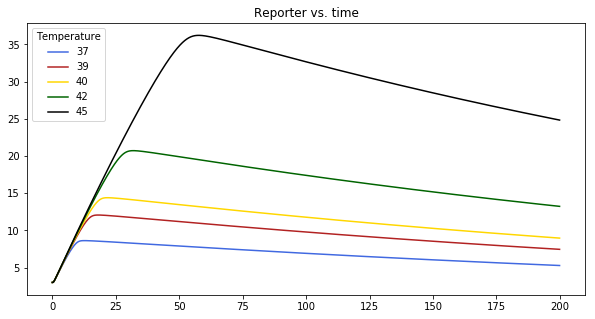

In [27]:
plot_species_vs_time(z, time, colors, names, "Reporter", 5)

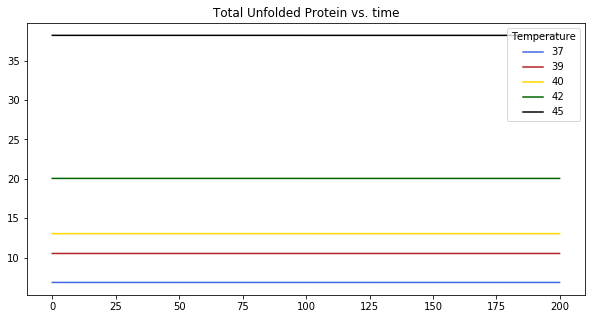

In [28]:
plot_species_vs_time(z, time, colors, names, "Total Unfolded Protein", [3,4])

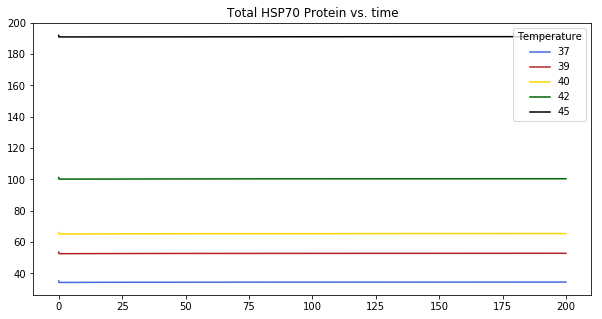

In [50]:
plot_species_vs_time(z, time, colors, names, "Total HSP70 Protein", [0, 2, 3])